In [ ]:
import glob
import os, sys
from keras import utils
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

In [ ]:
# unzip GTSRB_Final_Training_Images directory to same directory as this notebook
# https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

files = glob.glob('.\\GTSRB_Final_Training_Images\\GTSRB\\Final_Training\\Images\\**\\*.ppm')

In [ ]:
# convert to .jpg format
for infile in files:
    f, _ = os.path.splitext(infile)
    outfile = f + ".jpg"
    if infile != outfile:
        try:
            with Image.open(infile) as im:
                im.save(outfile)
        except OSError:
            print("cannot convert", infile)

In [ ]:
# create training and validation sets
# reference - https://www.tensorflow.org/tutorials/images/classification
dataset_train = utils.image_dataset_from_directory('C:\\Users\\geewh\\Desktop\\data 255\\project\\GTSRB_Final_Training_Images\\GTSRB\\Final_Training\\Images', 
                                                   batch_size=32, 
                                                   image_size=(128,128),
                                                   validation_split=0.2,
                                                   subset="training",
                                                   seed=1)

dataset_val = utils.image_dataset_from_directory('C:\\Users\\geewh\\Desktop\\data 255\\project\\GTSRB_Final_Training_Images\\GTSRB\\Final_Training\\Images', 
                                                   batch_size=32, 
                                                   image_size=(128,128),
                                                   validation_split=0.2,
                                                   subset="validation",
                                                   seed=1)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


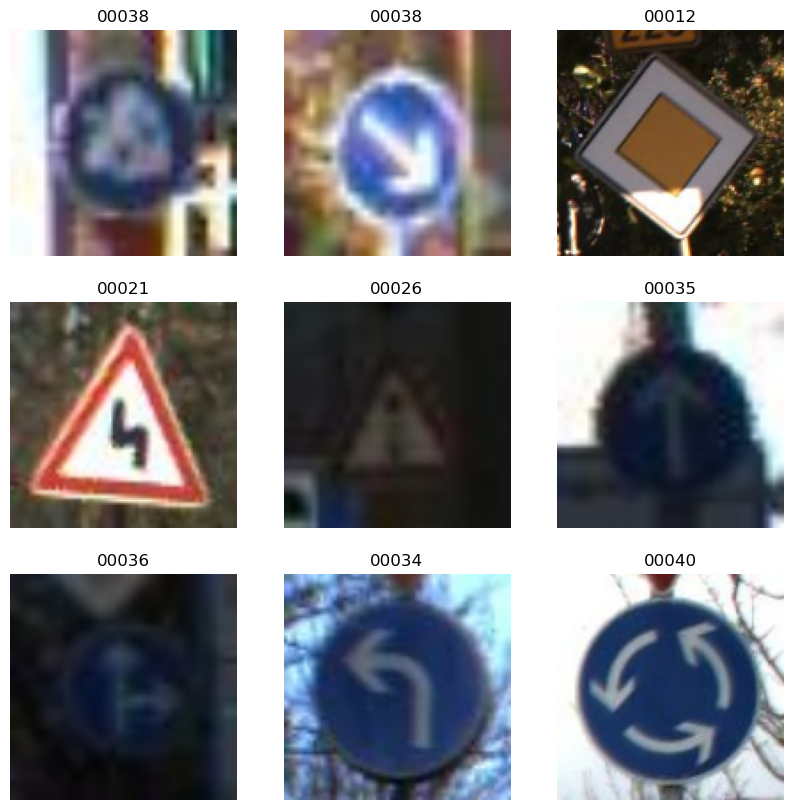

In [ ]:
# Diplay first nine images 
class_names = dataset_train.class_names

plt.figure(figsize=(10, 10))
for images, labels in dataset_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    print(images[i].numpy().astype("uint8").shape)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Optimization and normalization

AUTOTUNE = tf.data.AUTOTUNE

dataset_train = dataset_train.cache().prefetch(buffer_size=AUTOTUNE) # prevent i/o bottleneck
dataset_val = dataset_val.cache().prefetch(buffer_size=AUTOTUNE) # prevent i/o bottleneck

normalize_layer = layers.Rescaling(1/255.)

# use dataset_train_norm for training model
dataset_train_norm = dataset_train.map(lambda x,y: (normalize_layer(x),y)) 

image_batch, labels_batch = next(iter(dataset_train_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.04536612 1.0
